Classify whether images contain either a dog or a cat

The training data contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test data (1 = dog, 0 = cat)

We use CNN(Convolutional Neural Network) to classify images.

In [173]:
#Import packages
import os as myos
import zipfile as myzip
import pandas as mypd
import numpy as mynp
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as myplt
import seaborn as mysb

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import statistics as mystat


In [47]:
#Read the train zip file: train.zip
mytrainfile = myzip.ZipFile(file="/Users/sudiptarakshit/Desktop/NN Assignment/dogs-vs-cats/train.zip")

In [58]:
#Extract all file from train zip file
mytrainfile.extractall()

In [61]:
#Check the directory 
myos.listdir(path="/Users/sudiptarakshit/Desktop/NN Assignment/")

['.DS_Store', 'Untitled.ipynb', 'train', '.ipynb_checkpoints', 'dogs-vs-cats']

In [63]:
#Get the filenames in the train file
path = '/Users/sudiptarakshit/Desktop/NN Assignment/train/'
filenames = os.listdir(path)
#Check the file names
filenames[:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [64]:
#Categorize the images as dog or cat
label = []
for filename in filenames:
    if filename.split(sep='.')[0] =='cat':
        label.append('cat')
    else:
        label.append('dog')

In [76]:
#create a data frame
mydata = mypd.DataFrame(data={
                   'name':filenames,
                   'label':label
                 })

Here we have constructed a data frame from a dictionary



 
`

In [67]:
#Check the dataframe
mydata.head()

,name,label
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat


dog    12500
cat    12500
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

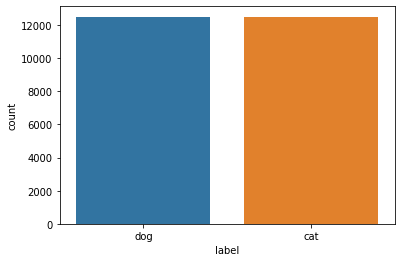

In [68]:
#Number of cats and dogs
print(mydata['label'].value_counts())
#Create a count plot
mysb.countplot(data=mydata, x=mydata['label'])

There are equal number of cats and dogs images.

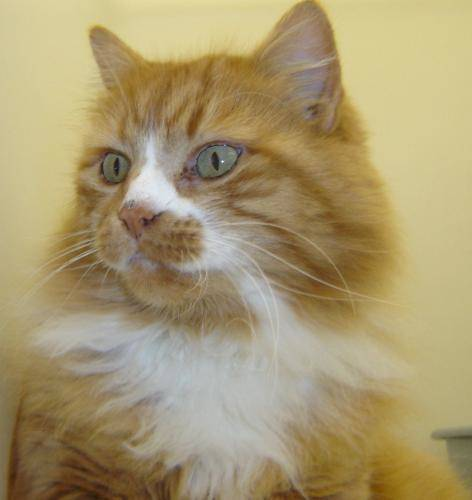

In [69]:
#Check image: An arbitary cat image
load_img(path+'cat.10009.jpg')

Here we have used concatenation of string to get the file path.

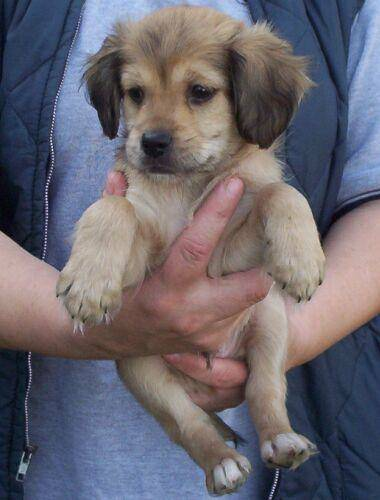

In [72]:
#Check image: An arbitary dog image
load_img(path=path+'dog.8011.jpg')

## Basic Model

**Basic architecture of CNN:**

In this model, we use 5 consecutive blocks from Conv2D and MaxPooling2d with different filter depths

Since we have a classification task, after 5 blocks we will transform our data into a 1D tensor and apply Dense layers

the last Dense layer should have 1 layer and activation='sigmoid' since we have a binary classification task

input_shape we will set (256, 256, 3) as the base for further use of the generator without resizing the image

In [74]:
#Model build
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [108]:
#Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)      

We use optimizer='Adam' as the most basic.


loss='binary_crossentropy' since we have a binary classification

metrics='acc' since we have the same number of classes and accuracy is a suitable metric for classification problem

In [107]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='acc')

## Data preprocessing: splitting train data into train, validation

We split the train data into 3 parts: train, test and validation data. 

train data = 70% of train dataset

validation data = 15% of train dataset

test data set = 15% of train dataset

On the train sample, we will train our model

On the val sample, we will check the ability of our model to generalize to unknown data

On the test sample, we will make the final prediction

To get an equal number of classes when splitting the data, we use stratify. With it, our classes will be related as cat:dog = 1:1

In [100]:
train, test_val = train_test_split(mydata, test_size=0.3, stratify=mydata['label'], random_state=100)

In [101]:
test, val = train_test_split(test_val, test_size=0.5,  stratify=test_val['label'], random_state=17)

In [103]:
print('train size:', train.shape[0],
      '\nvalidation size:', val.shape[0],
      '\ntest size:', test.shape[0],     
     )

train size: 17500 
validation size: 3750 
test size: 3750


In [104]:
print('train labels:\n',train['label'].value_counts(),
      '\n\nvalidataion labels:\n',val['label'].value_counts(),
      '\n\ntest labels:\n',test['label'].value_counts(),
      sep='')

train labels:
cat    8750
dog    8750
Name: label, dtype: int64

validataion labels:
dog    1875
cat    1875
Name: label, dtype: int64

test labels:
dog    1875
cat    1875
Name: label, dtype: int64


## Data Preprocessing: Data normalization

Let's apply an ImageDataGenerator to our data to make it look like an input_shape for our model.

Neural networks need to receive scaled data as input, for this we apply rescale=1./255

In this case, the image size is not specified, because flow_from_dataframe creates target_size=(256, 256) and default color_mode='rgb'

in case of changing the size of the input tensors and using other values, we would have to manually specify the dimensions and depth of the image

In [105]:
train_gen = ImageDataGenerator(rescale=1./255)
train_data = train_gen.flow_from_dataframe(train,
                                           directory=path,
                                           x_col='name',
                                           y_col='label',
                                           class_mode='binary',
                                           seed=17                                          
                                          )

val_gen = ImageDataGenerator(rescale=1./255)
val_data = val_gen.flow_from_dataframe(val,
                                       directory=path,
                                       x_col='name',
                                       y_col='label',
                                       class_mode='binary',
                                       seed=17  
                                      )

Found 17500 validated image filenames belonging to 2 classes.
Found 3750 validated image filenames belonging to 2 classes.


**batch_size**

In this case, we used the standard batch_size=32, but at the expense of this, use fewer epochs for training.

The larger the batch_size value, the less time it takes to train one epoch and the more epochs are needed to get good results.

The number of iterations in one epoch is train_size(20000)/batch_size(32)=625

**Base Model Training**

In [109]:
history = model.fit(x=train_data,
                    validation_data = val_data,
                    epochs=10 )

Epoch 1/10
547/547 [==============================] - 129s 234ms/step - loss: 0.6824 - acc: 0.5642 - val_loss: 0.6552 - val_acc: 0.6219
Epoch 2/10
547/547 [==============================] - 128s 235ms/step - loss: 0.6241 - acc: 0.6530 - val_loss: 0.5984 - val_acc: 0.6803
Epoch 3/10
547/547 [==============================] - 158s 289ms/step - loss: 0.5348 - acc: 0.7301 - val_loss: 0.5153 - val_acc: 0.7491
Epoch 4/10
547/547 [==============================] - 175s 320ms/step - loss: 0.4453 - acc: 0.7904 - val_loss: 0.4565 - val_acc: 0.7813
Epoch 5/10
547/547 [==============================] - 193s 353ms/step - loss: 0.3846 - acc: 0.8265 - val_loss: 0.4097 - val_acc: 0.8160
Epoch 6/10
547/547 [==============================] - 209s 381ms/step - loss: 0.3273 - acc: 0.8562 - val_loss: 0.4052 - val_acc: 0.8187
Epoch 7/10
547/547 [==============================] - 224s 408ms/step - loss: 0.2663 - acc: 0.8846 - val_loss: 0.4014 - val_acc: 0.8355
Epoch 8/10
547/547 [============================

In [159]:
#Check the model iteration data
model_data = mypd.DataFrame(history.history)

<AxesSubplot:>

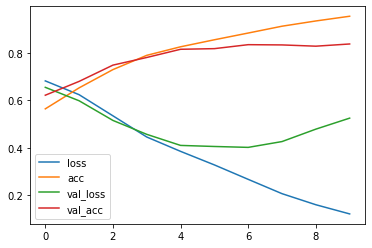

In [160]:
#Plot
model_data.plot()

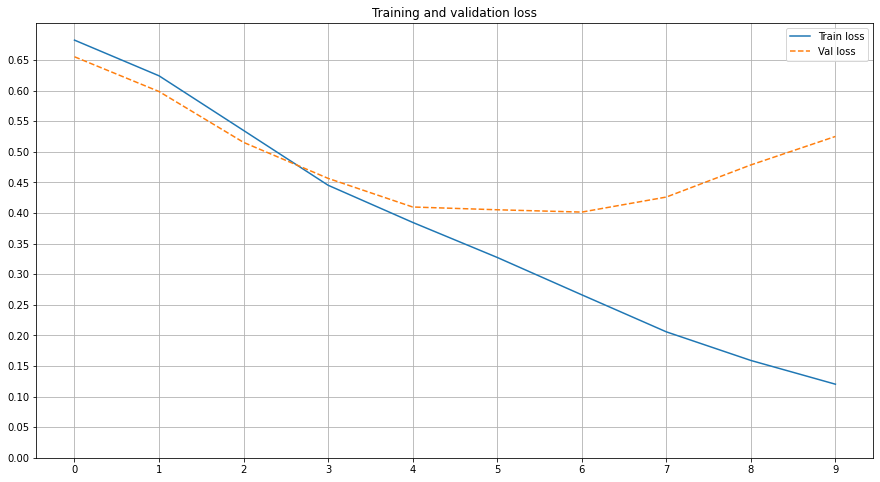

In [110]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,8))
plt.plot(loss, label='Train loss')
plt.plot(val_loss,'--', label='Val loss')
plt.title('Training and validation loss')
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0, 0.7, 0.05));
plt.grid()
plt.legend();

The plot clearly shows that after the 5th epoch, val loss stopped decreasing, but went up, we see the problem of overfitting

A strong fight against an overfitting problem can turn into an underfitting problem. 

We can go for early stopping.


In [120]:
#Model build
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [121]:
model.compile(optimizer='Adam' ,loss='binary_crossentropy', metrics='acc')

In [122]:
history_2 = model.fit(train_data,
                           validation_data = val_data,
                           epochs=50,
                           callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

Epoch 1/50
547/547 [==============================] - 130s 237ms/step - loss: 0.6908 - acc: 0.5283 - val_loss: 0.6907 - val_acc: 0.5616
Epoch 2/50
547/547 [==============================] - 129s 237ms/step - loss: 0.5844 - acc: 0.6886 - val_loss: 0.5273 - val_acc: 0.7291
Epoch 3/50
547/547 [==============================] - 143s 261ms/step - loss: 0.4382 - acc: 0.7948 - val_loss: 0.4109 - val_acc: 0.8125
Epoch 4/50
547/547 [==============================] - 158s 289ms/step - loss: 0.3491 - acc: 0.8458 - val_loss: 0.3587 - val_acc: 0.8357
Epoch 5/50
547/547 [==============================] - 171s 313ms/step - loss: 0.2807 - acc: 0.8790 - val_loss: 0.3620 - val_acc: 0.8400
Epoch 6/50
547/547 [==============================] - 182s 333ms/step - loss: 0.2192 - acc: 0.9091 - val_loss: 0.3428 - val_acc: 0.8632
Epoch 7/50
547/547 [==============================] - 182s 332ms/step - loss: 0.1559 - acc: 0.9354 - val_loss: 0.3763 - val_acc: 0.8525
Epoch 8/50
547/547 [============================

In [156]:
#Check the model iteration data
model_data = mypd.DataFrame(history_2.history)

<AxesSubplot:>

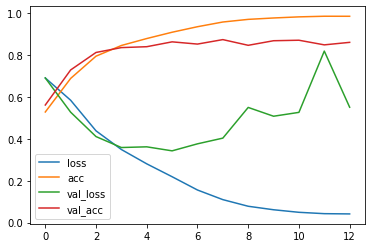

In [158]:
#Plot
model_data.plot()

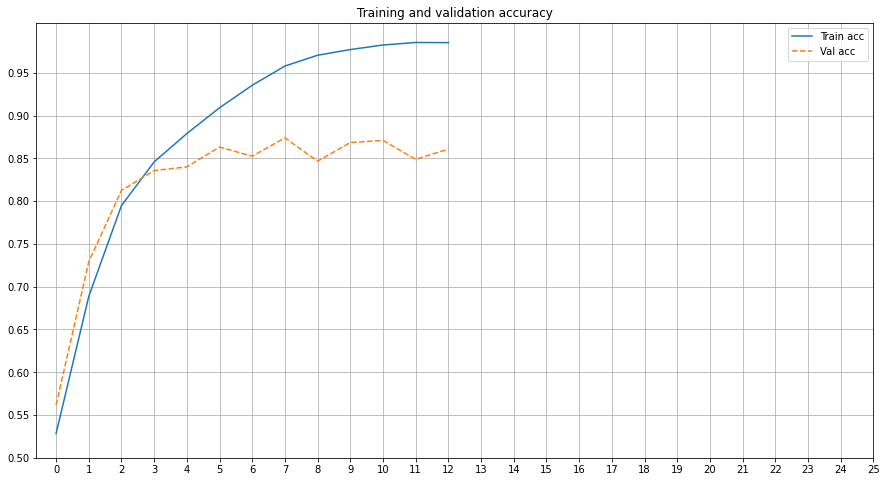

In [123]:
loss = history_2.history['acc']
val_loss = history_2.history['val_acc']

plt.figure(figsize=(15,8))
plt.plot(loss, label='Train acc')
plt.plot(val_loss,'--', label='Val acc')
plt.title('Training and validation accuracy')
plt.yticks(np.arange(0.5, 1, 0.05))
plt.xticks(np.arange(0, 26))
plt.grid()
plt.legend();

In [161]:
# test data
test_data = val_gen.flow_from_dataframe(test,
                                        directory=path,
                                        x_col='name',
                                        y_col='label',
                                        class_mode='binary',
                                        target_size=(256,256),
                                        shuffle=False,
                                        seed=17  
                                       )

Found 3750 validated image filenames belonging to 2 classes.


In [138]:
test_pred = model.predict(test_data)

In [139]:
pred_label = test_pred > 0.5
true_label = test_data.classes

In [163]:
#Confusion matrix
confusion_matrix(true_label, pred_label)

array([[1658,  217],
       [ 260, 1615]])

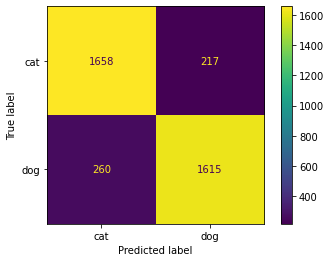

In [140]:
ConfusionMatrixDisplay(confusion_matrix(true_label, pred_label), display_labels=test_data.class_indices).plot();

In [142]:
#Model accuracy on test data
model.evaluate(test_data)

118/118 [==============================] - 8s 67ms/step - loss: 0.5117 - acc: 0.8728


[0.5117403864860535, 0.8727999925613403]

In [164]:
#True Positive
TP = 1615
#False Positive
FP = 217
#True Negative
TN = 1658
#False Negative
FN = 260

In [166]:
#Accuracy
(TP+TN)/(TP+FP+TN+FN)

0.8728

In [167]:
#Precision 
Precision = TP/(TP+FP)
round(Precision,2)

0.88

In [168]:
#Recall
Recall = TP/(TP+FN)
round(Recall,2)

0.86

In [169]:
#Specificity
Specificity = TN/(TN+FP)
round(Specificity,2)

0.88

In [174]:
#F-score
F_score = mystat.harmonic_mean([Precision,Recall])
round(F_score,3)

0.871